### This is the jupyter notebook for sentiment analysis of the tweets using the Twitter API
### FYP project
### Author: Muhammad Abu Bakar
### Author: Muhammad Faiz Hassan


In [72]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from tweepy import OAuthHandler


In [73]:
# 2. Import keys.py



auth = tweepy.OAuthHandler( consumer_key , consumer_key_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

print(api)


In [74]:
# 3.To get the tweets in a Proper format, first lets create a Dataframe to store the extracted data.

df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])

# df['date'] = df['date'].apply(lambda a: pd.to_datetime(a).date())
# df['date'] = pd.to_datetime(df['date'])
# df.dtypes
# df['date'] = df['date'].dt.tz_localize(None)
print(df)



Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


## We will use api as api.search inside this tweepy cursor.


In [75]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc




def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search_tweets, q=Topic,count=10, lang="en").items():
        print(i, end='\r')
        date=tweet.created_at
        df.loc[i,"Date"] = date.strftime("%Y-%m-%d")
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass

# take input from user
Topic = "Pakistan"
# Topic=["Pakistan"]
get_tweets(Topic , Count=10)

In [76]:
# Showing the data the Data
df.head(8)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2022-12-23,Afloat,False,RT @AbhijitChavda: Someone tell our Israeli fr...,0,744,भूमध्य रेखा से दाएं
1,2022-12-23,M Zia Ul Qamar,False,RT @akbarnasirkhan: Another son of @ICT_Police...,0,72,Islamabad
2,2022-12-23,AMIR,False,Pakistan among the lowest ranked countries in ...,0,0,
3,2022-12-23,Hasnain khan,False,RT @JamiatPK: It has been 75 long years that I...,0,16,"Peshawar, Pakistan"
4,2022-12-23,Abnt,False,RT @pakistan_untold: Pakistan was created on t...,0,707,
5,2022-12-23,OhYesThatGuy | Storyteller | Copywriter,False,@CSKFansOfficial @msdhoni Is this when he scor...,0,0,Dil Se(v) Indori❤️Baaki chhodo
6,2022-12-23,𝙆ᴬ𝙇𝐢𝙈 𝙐𝙇𝙇ᴬ𝙃🇵🇰,False,RT @callme_Mahnooor: Global ratings agency S&a...,0,29,🇵🇰GHQ🇵🇰
7,2022-12-23,Abbas Abbasi,False,RT @breeezofspring: There is a law of the jung...,0,1,


In [77]:
# Function to Clean the Tweet.
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
# clean the tweet remove RT, Special characters, links, etc without regex
def clean_tweet(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet) # remove @mentions
    tweet = re.sub(r'#', '', tweet) # remove # symbol
    tweet = re.sub(r'RT[\s]+', '', tweet) # remove RT
    tweet = re.sub(r'https?:\/\/\S+', '', tweet) # remove hyperlink
    tweet = re.sub(r'[^a-zA-Z0-9]', ' ', tweet) # remove special characters
    tweet = re.sub(r'\s+', ' ', tweet) # remove extra spaces
    tweet = re.sub(r'[0-9]+', '', tweet)
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # get bad and good words from the text
    tweet = tweet.lower()
    tweet = tweet.strip()
    tweet = tweet.split()
    tweet = [word for word in tweet if word not in stopwords.words('english')]
    print(tweet)
    return tweet
    




            
# We only want the Text so :

# (@[A-Za-z0-9]+)   : Delete Anything like @hello @Letsupgrade etc
# ([^0-9A-Za-z \t]) : Delete everything other than text,number,space,tabspace
# (\w+:\/\/\S+)     : Delete https://
# ([RT]) : Remove "RT" from the tweet

[nltk_data] Downloading package stopwords to /home/bakar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'



In [79]:
df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)


['someone', 'tell', 'israeli', 'friends', 'pakistan', 'years', 'ago', 'let', 'alone', 'years', 'ago', 'india']
['another', 'son', 'police', 'head', 'constable', 'adeel', 'hussain', 'laid', 'life', 'today', 'friday', 'save', 'many', 'many', 'others']
['pakistan', 'among', 'lowest', 'ranked', 'countries', 'adherence', 'rule', 'law', 'ranking', 'nations']
['long', 'years', 'islami', 'jamiat', 'talaba', 'pakistan', 'endeavoring', 'spread', 'message', 'quran', 'sunnah']
['untold', 'pakistan', 'created', 'logic', 'muslim', 'majority', 'hindus', 'worrying', 'growing', 'muslim', 'population', 'india']
['scored', 'pakistan']
['mahnooor', 'global', 'ratings', 'agency', 'amp', 'global', 'thursday', 'cut', 'pakistan', 'long', 'term', 'sovereign', 'credit', 'rating', 'one', 'notch', 'ccc']
['law', 'jungle', 'pakistan', 'thieves', 'sitting', 'helm', 'affairs', 'soon', 'came']
['amir', 'pakistan', 'secured', 'foreign', 'direct', 'investment', 'fdi', 'billion', 'first', 'months', 'financial', 'year', 

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2022-12-23,Afloat,False,RT @AbhijitChavda: Someone tell our Israeli fr...,0,744,भूमध्य रेखा से दाएं,"[someone, tell, israeli, friends, pakistan, ye..."
1,2022-12-23,M Zia Ul Qamar,False,RT @akbarnasirkhan: Another son of @ICT_Police...,0,72,Islamabad,"[another, son, police, head, constable, adeel,..."
2,2022-12-23,AMIR,False,Pakistan among the lowest ranked countries in ...,0,0,,"[pakistan, among, lowest, ranked, countries, a..."
3,2022-12-23,Hasnain khan,False,RT @JamiatPK: It has been 75 long years that I...,0,16,"Peshawar, Pakistan","[long, years, islami, jamiat, talaba, pakistan..."
4,2022-12-23,Abnt,False,RT @pakistan_untold: Pakistan was created on t...,0,707,,"[untold, pakistan, created, logic, muslim, maj..."


In [80]:
df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(11)


,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2022-12-23,Afloat,False,RT @AbhijitChavda: Someone tell our Israeli fr...,0,744,भूमध्य रेखा से दाएं,"[someone, tell, israeli, friends, pakistan, ye...",Neutral
1,2022-12-23,M Zia Ul Qamar,False,RT @akbarnasirkhan: Another son of @ICT_Police...,0,72,Islamabad,"[another, son, police, head, constable, adeel,...",Positive
2,2022-12-23,AMIR,False,Pakistan among the lowest ranked countries in ...,0,0,,"[pakistan, among, lowest, ranked, countries, a...",Neutral
3,2022-12-23,Hasnain khan,False,RT @JamiatPK: It has been 75 long years that I...,0,16,"Peshawar, Pakistan","[long, years, islami, jamiat, talaba, pakistan...",Negative
4,2022-12-23,Abnt,False,RT @pakistan_untold: Pakistan was created on t...,0,707,,"[untold, pakistan, created, logic, muslim, maj...",Neutral
5,2022-12-23,OhYesThatGuy | Storyteller | Copywriter,False,@CSKFansOfficial @msdhoni Is this when he scor...,0,0,Dil Se(v) Indori❤️Baaki chhodo,"[scored, pakistan]",Neutral
6,2022-12-23,𝙆ᴬ𝙇𝐢𝙈 𝙐𝙇𝙇ᴬ𝙃🇵🇰,False,RT @callme_Mahnooor: Global ratings agency S&a...,0,29,🇵🇰GHQ🇵🇰,"[mahnooor, global, ratings, agency, amp, globa...",Neutral
7,2022-12-23,Abbas Abbasi,False,RT @breeezofspring: There is a law of the jung...,0,1,,"[law, jungle, pakistan, thieves, sitting, helm...",Neutral
8,2022-12-23,Ahsan rajpoot,False,RT @kh_amir73: Pakistan secured Foreign Direct...,0,31,"لاہور, پاکستان","[amir, pakistan, secured, foreign, direct, inv...",Positive
9,2022-12-23,Saleem Ahmed,False,RT @akbarnasirkhan: Another son of @ICT_Police...,0,72,"Karachi, Pakistan","[another, son, police, head, constable, adeel,...",Positive


In [81]:


# Check Summary of Random Record
n = 3
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])



Original tweet:
 RT @JamiatPK: It has been 75 long years that Islami Jamiat e Talaba Pakistan is endeavoring to spread the message of Quran and Sunnah in th…

Clean tweet:
 ['long', 'years', 'islami', 'jamiat', 'talaba', 'pakistan', 'endeavoring', 'spread', 'message', 'quran', 'sunnah']

Sentiment of the tweet:
 Negative


In [82]:
# Overall Summary

print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))


Total Tweets Extracted for Topic : Pakistan are : 11
Total Positive Tweets are : 4
Total Negative Tweets are : 1
Total Neutral Tweets are : 6


In [83]:
df["Sentiment"].value_counts()

Neutral     6
Positive    4
Negative    1
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Summary of Counts for Total tweets')

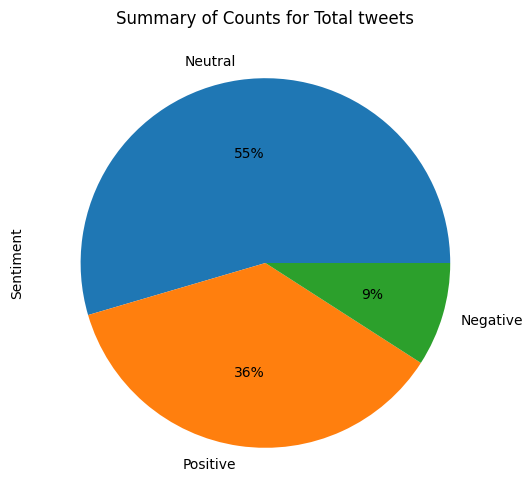

In [84]:
#plotting the data in a pie chart according to the sentiment of the tweets
plt.figure(figsize=(8,6))
df.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title("Summary of Counts for Total tweets")





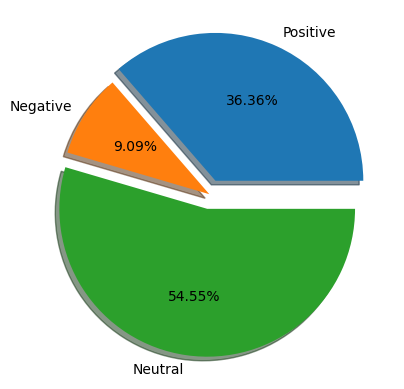

In [85]:



# Piechart 
#string, used to label the wedges with their numeric value. The label will be placed inside the wedge. The format string will be fmt%pct.

a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');



ValueError: 'explode' must be of length 'x'

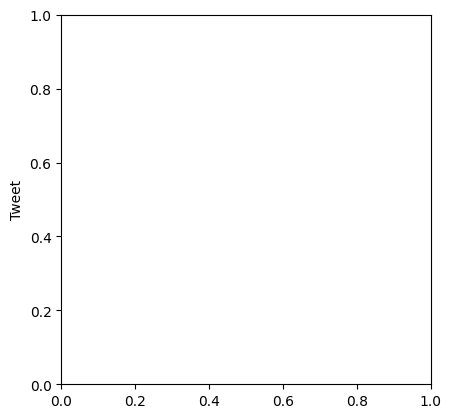

In [86]:
#check if verified user has more tweets

df.groupby("IsVerified")["Tweet"].count().plot(kind="pie",shadow=True,explode=(0.1,0.1),autopct='%1.2f%%')
plt.title("Verified User vs Non Verified User")


